In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [66]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [67]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [69]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [70]:
#Convert Categorical values to columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Convert MSZONING
labelencoder_X_1 = LabelEncoder()
df['MSZoning'] = labelencoder_X_1.fit_transform(df['MSZoning'])
#Convert Street
labelencoder_X_2 = LabelEncoder()
df['Street'] = labelencoder_X_2.fit_transform(df['Street'])
#Convert LotShape
labelencoder_X_3 = LabelEncoder()
df['LotShape'] = labelencoder_X_3.fit_transform(df['LotShape'])
#Convert LandContour
labelencoder_X_4 = LabelEncoder()
df['LandContour'] = labelencoder_X_4.fit_transform(df['LandContour'])
#Convert MSZONING
labelencoder_X_1 = LabelEncoder()
df_test['MSZoning'] = labelencoder_X_1.fit_transform(df_test['MSZoning'].astype(str))
#Convert Street
labelencoder_X_2 = LabelEncoder()
df_test['Street'] = labelencoder_X_2.fit_transform(df_test['Street'].astype(str))
#Convert LotShape
labelencoder_X_3 = LabelEncoder()
df_test['LotShape'] = labelencoder_X_3.fit_transform(df_test['LotShape'].astype(str))
#Convert LandContour
labelencoder_X_4 = LabelEncoder()
df_test['LandContour'] = labelencoder_X_4.fit_transform(df_test['LandContour'].astype(str))

In [71]:
#Utilities	LotConfig	LandSlope	Neighborhood	
#Convert Utilities
labelencoder_X_5 = LabelEncoder()
df['Utilities'] = labelencoder_X_5.fit_transform(df['Utilities'])
df_test['Utilities'] = labelencoder_X_5.fit_transform(df_test['Utilities'].astype(str))
#Convert LotConfig
labelencoder_X_6 = LabelEncoder()
df['LotConfig'] = labelencoder_X_6.fit_transform(df['LotConfig'])
df_test['LotConfig'] = labelencoder_X_6.fit_transform(df_test['LotConfig'].astype(str))
#Convert LandSlope
labelencoder_X_7 = LabelEncoder()
df['LandSlope'] = labelencoder_X_7.fit_transform(df['LandSlope'])
df_test['LandSlope'] = labelencoder_X_7.fit_transform(df_test['LandSlope'].astype(str))
#Convert Neighborhood
labelencoder_X_8 = LabelEncoder()
df['Neighborhood'] = labelencoder_X_8.fit_transform(df['Neighborhood'])
df_test['Neighborhood'] = labelencoder_X_8.fit_transform(df_test['Neighborhood'].astype(str))

In [72]:
# Condition1	Condition2	BldgType	HouseStyle
#Convert Condition1
labelencoder_X_9 = LabelEncoder()
df['Condition1'] = labelencoder_X_9.fit_transform(df['Condition1'].astype(str))
df_test['Condition1'] = labelencoder_X_9.fit_transform(df_test['Condition1'].astype(str))
#Convert Condition2
labelencoder_X_10 = LabelEncoder()
df['Condition2'] = labelencoder_X_10.fit_transform(df['Condition2'].astype(str))
df_test['Condition2'] = labelencoder_X_10.fit_transform(df_test['Condition2'].astype(str))
#Convert BldgType
labelencoder_X_11 = LabelEncoder()
df['BldgType'] = labelencoder_X_11.fit_transform(df['BldgType'].astype(str))
df_test['BldgType'] = labelencoder_X_11.fit_transform(df_test['BldgType'].astype(str))
#Convert HouseStyle
labelencoder_X_12 = LabelEncoder()
df['HouseStyle'] = labelencoder_X_12.fit_transform(df['HouseStyle'].astype(str))
df_test['HouseStyle'] = labelencoder_X_12.fit_transform(df_test['HouseStyle'].astype(str))


In [73]:
# RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType
#Convert RoofStyle
labelencoder_X_13 = LabelEncoder()
df['RoofStyle'] = labelencoder_X_13.fit_transform(df['RoofStyle'])
df_test['RoofStyle'] = labelencoder_X_13.fit_transform(df_test['RoofStyle'])
#Convert RoofMatl
labelencoder_X_14 = LabelEncoder()
df['RoofMatl'] = labelencoder_X_14.fit_transform(df['RoofMatl'])
df_test['RoofMatl'] = labelencoder_X_14.fit_transform(df_test['RoofMatl'])
#Convert Exterior1st
labelencoder_X_15 = LabelEncoder()
df['Exterior1st'] = labelencoder_X_15.fit_transform(df['Exterior1st'])
df_test['Exterior1st'] = labelencoder_X_15.fit_transform(df_test['Exterior1st'].astype(str))
#Convert Exterior2nd
labelencoder_X_16 = LabelEncoder()
df['Exterior2nd'] = labelencoder_X_16.fit_transform(df['Exterior2nd'])
df_test['Exterior2nd'] = labelencoder_X_16.fit_transform(df_test['Exterior2nd'].astype(str))
#Convert MasVnrType
labelencoder_X_17 = LabelEncoder()
df['MasVnrType'] = labelencoder_X_17.fit_transform(df['MasVnrType'].astype(str))
df_test['MasVnrType'] = labelencoder_X_17.fit_transform(df_test['MasVnrType'].astype(str))

In [74]:
# ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1  BsmtFinType2
#Convert ExterQual
labelencoder_X_18 = LabelEncoder()
df['ExterQual'] = labelencoder_X_18.fit_transform(df['ExterQual'])
df_test['ExterQual'] = labelencoder_X_18.fit_transform(df_test['ExterQual'])
#Convert ExterCond
labelencoder_X_19 = LabelEncoder()
df['ExterCond'] = labelencoder_X_19.fit_transform(df['ExterCond'])
df_test['ExterCond'] = labelencoder_X_19.fit_transform(df_test['ExterCond'])
#Convert Foundation
labelencoder_X_20 = LabelEncoder()
df['Foundation'] = labelencoder_X_20.fit_transform(df['Foundation'])
df_test['Foundation'] = labelencoder_X_20.fit_transform(df_test['Foundation'])
#Convert BsmtQual
labelencoder_X_21 = LabelEncoder()
df['BsmtQual'] = labelencoder_X_21.fit_transform(df['BsmtQual'].astype(str))
df_test['BsmtQual'] = labelencoder_X_21.fit_transform(df_test['BsmtQual'].astype(str))
#Convert MasVnrType
labelencoder_X_22 = LabelEncoder()
df['BsmtCond'] = labelencoder_X_22.fit_transform(df['BsmtCond'].astype(str))
df_test['BsmtCond'] = labelencoder_X_22.fit_transform(df_test['BsmtCond'].astype(str))
#Convert BsmtExposure
labelencoder_X_23 = LabelEncoder()
df['BsmtExposure'] = labelencoder_X_23.fit_transform(df['BsmtExposure'].astype(str))
df_test['BsmtExposure'] = labelencoder_X_23.fit_transform(df_test['BsmtExposure'].astype(str))
#Convert BsmtFinType1
labelencoder_X_24 = LabelEncoder()
df['BsmtFinType1'] = labelencoder_X_24.fit_transform(df['BsmtFinType1'].astype(str))
df_test['BsmtFinType1'] = labelencoder_X_24.fit_transform(df_test['BsmtFinType1'].astype(str))
#Convert BsmtFinType2
labelencoder_X_25 = LabelEncoder()
df['BsmtFinType2'] = labelencoder_X_25.fit_transform(df['BsmtFinType2'].astype(str))
df_test['BsmtFinType2'] = labelencoder_X_25.fit_transform(df_test['BsmtFinType2'].astype(str))

In [75]:
# Heating	HeatingQC	CentralAir	Electrical
#Convert Heating
labelencoder_X_26 = LabelEncoder()
df['Heating'] = labelencoder_X_26.fit_transform(df['Heating'].astype(str))
df_test['Heating'] = labelencoder_X_26.fit_transform(df_test['Heating'].astype(str))
#Convert HeatingQC
labelencoder_X_27 = LabelEncoder()
df['HeatingQC'] = labelencoder_X_27.fit_transform(df['HeatingQC'].astype(str))
df_test['HeatingQC'] = labelencoder_X_27.fit_transform(df_test['HeatingQC'].astype(str))
#Convert CentralAir
labelencoder_X_28 = LabelEncoder()
df['CentralAir'] = labelencoder_X_28.fit_transform(df['CentralAir'].astype(str))
df_test['CentralAir'] = labelencoder_X_28.fit_transform(df_test['CentralAir'].astype(str))
#Convert Electrical
labelencoder_X_29 = LabelEncoder()
df['Electrical'] = labelencoder_X_29.fit_transform(df['Electrical'].astype(str))
df_test['Electrical'] = labelencoder_X_29.fit_transform(df_test['Electrical'].astype(str))

In [76]:
#Convert KitchenQual
labelencoder_X_30 = LabelEncoder()
df['KitchenQual'] = labelencoder_X_30.fit_transform(df['KitchenQual'].astype(str))
df_test['KitchenQual'] = labelencoder_X_30.fit_transform(df_test['KitchenQual'].astype(str))
#Convert Functional
labelencoder_X_31 = LabelEncoder()
df['Functional'] = labelencoder_X_31.fit_transform(df['Functional'].astype(str))
df_test['Functional'] = labelencoder_X_31.fit_transform(df_test['Functional'].astype(str))
#Convert FireplaceQu
labelencoder_X_32 = LabelEncoder()
df['FireplaceQu'] = labelencoder_X_32.fit_transform(df['FireplaceQu'].astype(str))
df_test['FireplaceQu'] = labelencoder_X_32.fit_transform(df_test['FireplaceQu'].astype(str))
#Convert GarageType
labelencoder_X_33 = LabelEncoder()
df['GarageType'] = labelencoder_X_33.fit_transform(df['GarageType'].astype(str))
df_test['GarageType'] = labelencoder_X_33.fit_transform(df_test['GarageType'].astype(str))
#Convert GarageFinish
labelencoder_X_34 = LabelEncoder()
df['GarageFinish'] = labelencoder_X_34.fit_transform(df['GarageFinish'].astype(str))
df_test['GarageFinish'] = labelencoder_X_34.fit_transform(df_test['GarageFinish'].astype(str))
#Convert GarageQual
labelencoder_X_35 = LabelEncoder()
df['GarageQual'] = labelencoder_X_35.fit_transform(df['GarageQual'].astype(str))
df_test['GarageQual'] = labelencoder_X_35.fit_transform(df_test['GarageQual'].astype(str))
#Convert GarageCond
labelencoder_X_36 = LabelEncoder()
df['GarageCond'] = labelencoder_X_36.fit_transform(df['GarageCond'].astype(str))
df_test['GarageCond'] = labelencoder_X_36.fit_transform(df_test['GarageCond'].astype(str))
#Convert PavedDrive
labelencoder_X_37 = LabelEncoder()
df['PavedDrive'] = labelencoder_X_36.fit_transform(df['PavedDrive'].astype(str))
df_test['PavedDrive'] = labelencoder_X_36.fit_transform(df_test['PavedDrive'].astype(str))

In [77]:
#Convert PoolQC
labelencoder_X_38 = LabelEncoder()
df['PoolQC'] = labelencoder_X_38.fit_transform(df['PoolQC'].astype(str))
df_test['PoolQC'] = labelencoder_X_38.fit_transform(df_test['PoolQC'].astype(str))
#Convert Fence
labelencoder_X_39 = LabelEncoder()
df['Fence'] = labelencoder_X_39.fit_transform(df['Fence'].astype(str))
df_test['Fence'] = labelencoder_X_39.fit_transform(df_test['Fence'].astype(str))
#Convert MiscFeature
labelencoder_X_40 = LabelEncoder()
df['MiscFeature'] = labelencoder_X_40.fit_transform(df['MiscFeature'].astype(str))
df_test['MiscFeature'] = labelencoder_X_40.fit_transform(df_test['MiscFeature'].astype(str))
#Convert SaleType
labelencoder_X_41 = LabelEncoder()
df['SaleType'] = labelencoder_X_41.fit_transform(df['SaleType'].astype(str))
df_test['SaleType'] = labelencoder_X_41.fit_transform(df_test['SaleType'].astype(str))
#Convert SaleCondition
labelencoder_X_42 = LabelEncoder()
df['SaleCondition'] = labelencoder_X_42.fit_transform(df['SaleCondition'].astype(str))
df_test['SaleCondition'] = labelencoder_X_42.fit_transform(df_test['SaleCondition'].astype(str))

In [78]:
df.drop(columns="Alley")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,5,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,3,2,2,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,3,4,4,0,8,2007,8,4,307000
7,8,60,3,NaN,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,4,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,3,4,2,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,4,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,3,4,4,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,4,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,3,4,4,0,1,2008,8,4,118000


In [79]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [80]:
df.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.351799
LotArea          0.263843
Street           0.041036
LotShape        -0.255580
LandContour      0.015453
Utilities       -0.014314
LotConfig       -0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType       0.029658
MasVnrArea       0.477493
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.620886
                   ...   
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
KitchenQual     -0.589189
TotRmsAbvGrd     0.533723
Functional       0.115328
Fireplaces       0.466929
FireplaceQu     -0.459605
GarageType  

In [81]:
group_SalePrice = df.groupby(['OverallQual'])
average_by_SalePrice = group_SalePrice['SalePrice'].mean()

Text(0.5, 1.0, ' SalePrice by OverallQual')

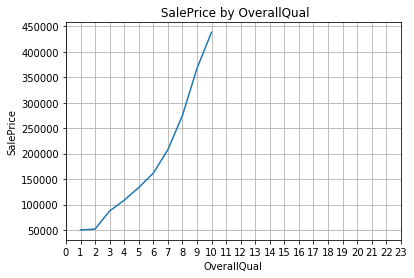

In [82]:
plt.plot(average_by_SalePrice.index,average_by_SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title(' SalePrice by OverallQual')

In [83]:
# Save all data
df.to_csv('houseprices_all.csv',index=True)

## Training and Validation Set 


In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [85]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [86]:
rows = df.shape[0]
train = int(.8 * rows)
test = int(.2 * rows)


In [87]:
rows, train, test

(1460, 1168, 292)

In [88]:
columns=['Id','Alley']
df=df.drop(columns=columns)

In [89]:
# Write Training Set
df[:train].to_csv('houseprices_train.csv')

In [90]:
df[:train].shape[0]

1168

In [91]:
df[train:].to_csv('houseprices_validation.csv')

In [92]:
df[train:].shape[0]

292

In [93]:
columns=df.columns

In [94]:
','.join(columns)

'MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice'

In [95]:
# Write Column List
with open('houseprices_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [96]:
columns=['Id','Alley']
df_test=df_test.drop(columns=columns)
df_test.to_csv('houseprices_test.csv')

In [97]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,3,0,1,2010,8,4
